<a href="https://colab.research.google.com/github/Ian-costermani/PS-Analytica_UFRJ/blob/main/Analytica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BIBLIOTECAS**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from scipy.stats import stats
import warnings

warnings.filterwarnings('ignore')

**IMPORTANDO OS DADOS**

In [3]:

esgoto_df= pd.read_csv('/content/esgotos.csv.gz')

adh= pd.read_csv('/content/mundo_onu_adh_municipio.csv.gz')

adh_uf = pd.read_csv('/content/mundo_onu_adh_uf.csv.gz')

snis = pd.read_csv('/content/br_mdr_snis_municipio_agua_esgoto.csv.gz')


geo_json = 'https://raw.githubusercontent.com/tbrugz/geodata-br/refs/heads/master/geojson/geojs-100-mun.json'
geo_df = gpd.read_file(geo_json)


**Para criação de mapas geoespaciais, utilizei a biblioteca Geopandas para ler um arquivo JSON com as coordenadas dos municipios brasileiros **

**FUNCOES**

In [9]:
def mapa(dataframe, feature_id ,coluna, titulo, cor ):
  fig, ax = plt.subplots(1, 1, figsize=(12, 8))
  geo_df['id']= geo_df['id'].astype(int)
  merge_df =  geo_df.merge(dataframe,left_on='id', right_on= feature_id, how='inner')
  merge_df.plot(column=coluna, ax=ax, legend=True,
            cmap=cor,
            missing_kwds={
                "color": "lightgrey",
                "label": "Valores Faltantes",
                "hatch": "///",
            })
  plt.title(titulo, fontsize=16)
  plt.axis('off')
  plt.show()

In [82]:
def grafico_regressao(df, variavel_x, variavel_y, hue):
  cores = ['ForestGreen','Crimson','Chocolate','Purple','DarkTurquoise']
  sns.regplot(data=df, x=variavel_x, y=variavel_y, scatter=False, color='gray')
  sns.scatterplot(data=df, x=variavel_x, y=variavel_y, hue=hue, palette=cores, alpha=0.6)
  plt.legend(title='Região')
  plt.show()

In [50]:
def grafico_boxplot(df, var_x, var_y, titulo):
  cores= ['ForestGreen','Crimson','Chocolate','Purple','DarkTurquoise']

  plt.figure(figsize=(12, 6))
  sns.boxplot(df, x=var_x, y=var_y, palette=cores)
  plt.title(titulo, fontsize=16)


In [43]:
def grafico_barras(df, var_x, var_y, titulo, label_y):
  cores = ['Chocolate','Crimson','ForestGreen','Purple','DarkTurquoise']

  plt.figure(figsize=(12, 6))
  sns.barplot(data=df,x=var_x,y=var_y, palette=cores,ci=None)
  plt.title(titulo, fontsize=16)
  plt.ylabel(label_y, fontsize=12)
  plt.tight_layout()
  plt.show()

In [10]:


def get_regiao(uf):

    uf_dict = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['GO', 'MT', 'MS', 'DF'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
     }

    for regiao, ufs in uf_dict.items():
        if uf in ufs:
            return regiao
    return None

In [54]:
def calcula_r2(x,y):
  slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
  return r_value**2

**TRATAMENTO DOS DADOS**

In [4]:
pd.set_option('display.max_columns', None)

In [5]:

esgoto_df.columns

Index(['id_municipio', 'sigla_uf', 'populacao_urbana_2013',
       'populacao_urbana_2035', 'prestador_servico_esgotamento_sanitario',
       'sigla_prestador', 'indice_sem_atendimento_sem_coleta_sem_tratamento',
       'indice_atendimento_solucao_individual',
       'indice_atendimento_com_coleta_sem_tratamento',
       'indice_atendimento_com_coleta_com_tratamento',
       'vazao_sem_coleta_sem_tratamento', 'vazao_solucao_individual',
       'vazao_com_coleta_sem_tratamento', 'vazao_com_coleta_com_tratamento',
       'vazao_total', 'carga_gerada_sem_coleta_sem_tratamento',
       'carga_gerada_encaminhada_solucao_individual',
       'carga_gerada_com_coleta_sem_tratamento',
       'carga_gerada_com_coleta_com_tratamento', 'carga_gerada_total',
       'carga_lancada_sem_coleta_sem_tratamento',
       'carga_lancada_proveniente_solucao_individual',
       'carga_lancada_com_coleta_sem_tratamento',
       'carga_lancada_com_coleta_com_tratamento', 'carga_lancada_total',
       'indice_a

In [6]:
#Atlas Esgotos
colunas = ['id_municipio', 'sigla_uf','populacao_urbana_2013' ,'indice_sem_atendimento_sem_coleta_sem_tratamento',
       'indice_atendimento_solucao_individual','indice_atendimento_com_coleta_sem_tratamento',
       'indice_atendimento_com_coleta_com_tratamento','investimento_coleta_tratatamento']
esgoto = esgoto_df[colunas]

In [64]:
#Criando dataframe dos índices dos Estados (considerando a media dos indices dos municipios)
esgoto_uf = esgoto.groupby('sigla_uf').agg({'populacao_urbana_2013':'sum','indice_sem_atendimento_sem_coleta_sem_tratamento':'mean','indice_atendimento_com_coleta_sem_tratamento':'mean',
                                            'indice_atendimento_com_coleta_com_tratamento':'mean','indice_atendimento_solucao_individual':'mean','investimento_coleta_tratatamento':'sum'})
esgoto_uf.reset_index(inplace=True)
esgoto_uf['regiao'] = esgoto_uf['sigla_uf'].apply(get_regiao)
esgoto_uf.head()


,sigla_uf,populacao_urbana_2013,indice_sem_atendimento_sem_coleta_sem_tratamento,indice_atendimento_com_coleta_sem_tratamento,indice_atendimento_com_coleta_com_tratamento,indice_atendimento_solucao_individual,investimento_coleta_tratatamento,regiao
0,AC,562843,0.763095,0.034727,0.039436,0.162759,8.411522e+08,Norte
1,AL,2437832,0.733762,0.154803,0.040717,0.070716,3.115973e+09,Nordeste
2,AM,3014220,0.770248,0.081418,0.007032,0.141303,4.305945e+09,Norte
3,AP,658840,0.782737,0.026031,0.045544,0.145681,1.136176e+09,Norte
4,BA,10880101,0.579994,0.229509,0.140061,0.050439,9.595973e+09,Nordeste


In [14]:
#Criando dataframe dos índices por regiao (considerando a média dos indices dos estados)
esgoto_regiao = esgoto_uf.groupby('regiao').agg({'populacao_urbana_2013':'sum','indice_sem_atendimento_sem_coleta_sem_tratamento':'mean','indice_atendimento_com_coleta_sem_tratamento':'mean',
                                            'indice_atendimento_com_coleta_com_tratamento':'mean','investimento_coleta_tratatamento':'sum'})
esgoto_regiao.reset_index(inplace=True)
esgoto_regiao.head()

,regiao,populacao_urbana_2013,indice_sem_atendimento_sem_coleta_sem_tratamento,indice_atendimento_com_coleta_sem_tratamento,indice_atendimento_com_coleta_com_tratamento,investimento_coleta_tratatamento
0,Centro-Oeste,13332196,0.551426,0.024166,0.312305,1.394744e+10
1,Nordeste,40901386,0.635164,0.182051,0.076454,4.974583e+10
2,Norte,12515808,0.765326,0.048240,0.026476,1.913789e+10
3,Sudeste,78521597,0.182288,0.400746,0.360165,4.348226e+10
4,Sul,24509618,0.444533,0.106326,0.125649,2.318292e+10


In [ ]:
#Criando dataframes para regiao sudeste e centro-oeste
esgoto_sudeste = esgoto_uf[esgoto_uf['regiao']=='Sudeste']
esgoto_centro_oeste = esgoto_uf[esgoto_uf['regiao']=='Centro-Oeste']
esgoto_sudeste =esgoto_sudeste[['sigla_uf','indice_atendimento_com_coleta_com_tratamento']].sort_values(by='indice_atendimento_com_coleta_com_tratamento', ascending=False)
esgoto_centro_oeste =esgoto_centro_oeste[['sigla_uf','indice_atendimento_com_coleta_com_tratamento']].sort_values(by='indice_atendimento_com_coleta_com_tratamento', ascending=False)

In [22]:
#ADH
adh=adh[adh['ano']==2010]
#relacao adh -- esgoto
adh_uf= adh_uf.merge(esgoto_uf, on = 'sigla_uf', how='inner')


,0
ano,0
id_municipio,0
expectativa_vida,0
fecundidade_total,0
mortalidade_1,0
...,...
indice_frequencia_escolar,0
idhm,0
idhm_e,0
idhm_l,0


In [26]:
#Sistema Nacional de Informações sobre Saneamento (SNIS)
snis_uf = snis.groupby(['sigla_uf','ano']).agg({'investimento_agua_estado': 'sum', 'investimento_esgoto_estado': 'sum','investimento_total_estado':'sum'})
snis_uf.reset_index(inplace=True)
snis_uf = snis_uf[snis_uf['ano']>=2011]

# **Análises**

In [8]:
esgoto['indice_sem_atendimento_sem_coleta_sem_tratamento'].describe()

,indice_sem_atendimento_sem_coleta_sem_tratamento
count,5570.000000
mean,0.466012
std,0.355546
min,0.000000
25%,0.112350
50%,0.427900
75%,0.827000
max,1.000000


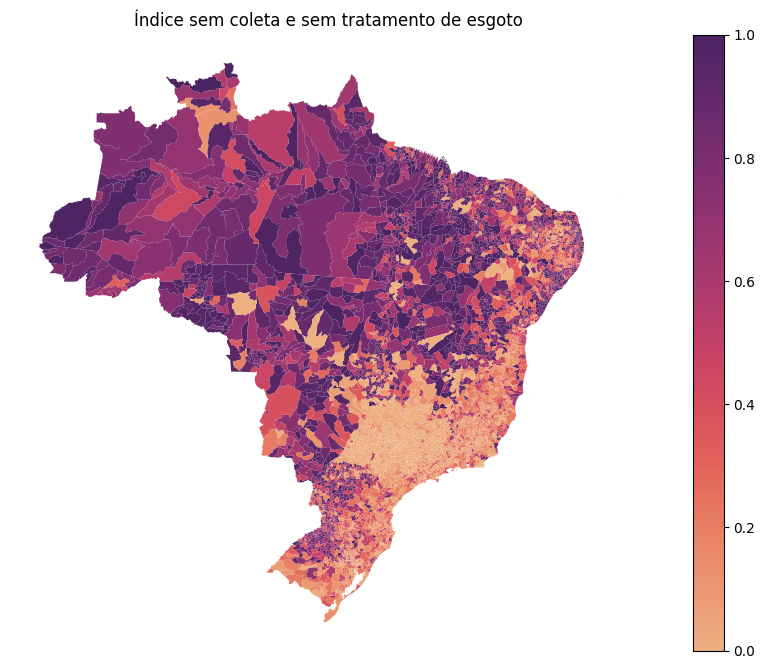

In [11]:
mapa(esgoto,'id_municipio', 'indice_sem_atendimento_sem_coleta_sem_tratamento', 'Índice sem coleta e sem tratamento de esgoto', 'flare')

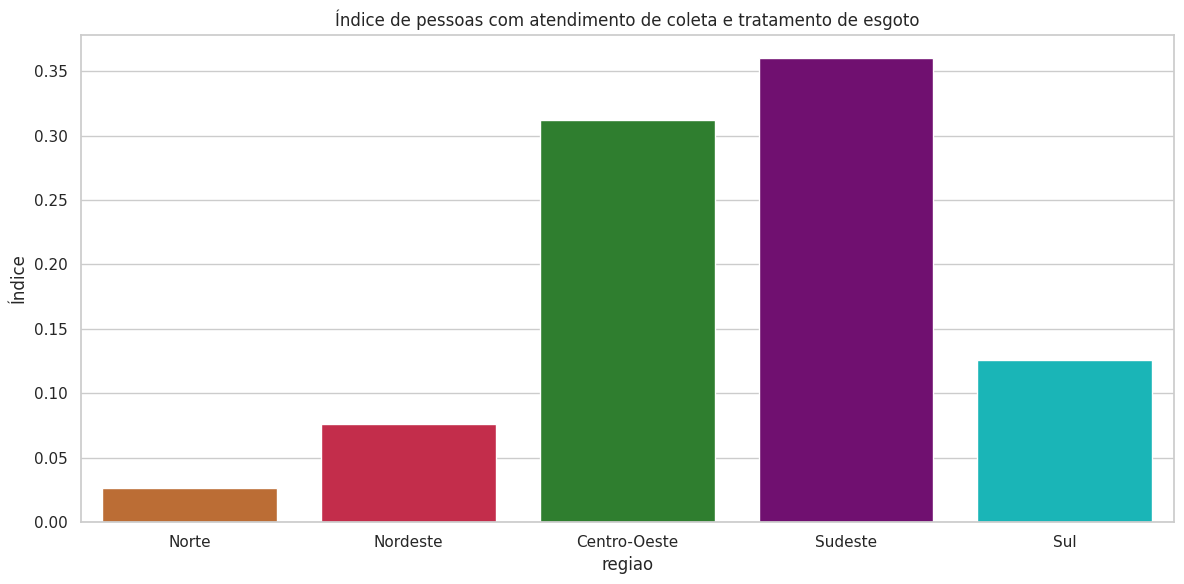

In [47]:
grafico_barras(esgoto_uf,'regiao','indice_atendimento_com_coleta_com_tratamento','Índice de pessoas com atendimento de coleta e tratamento de esgoto', 'Índice')

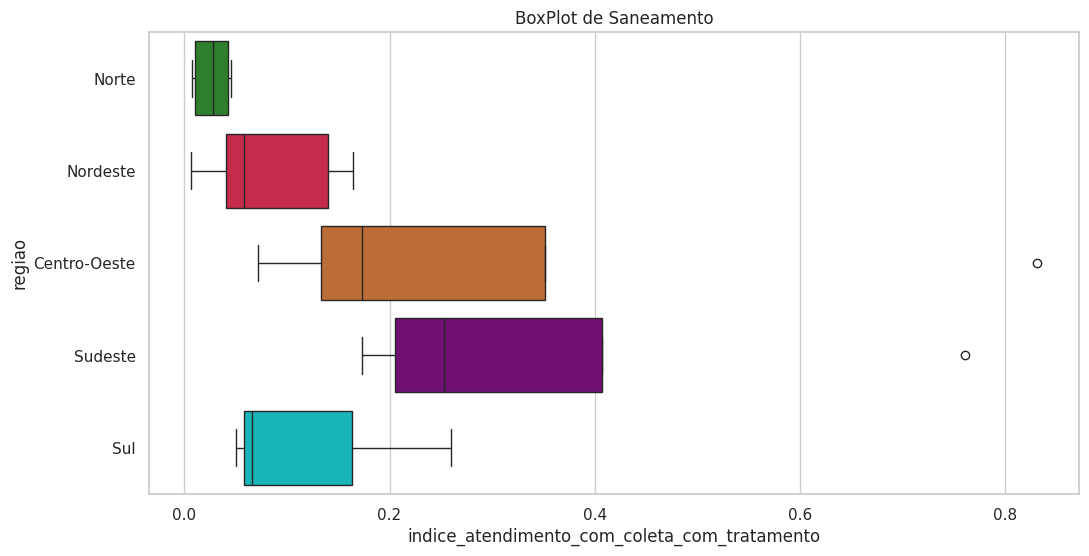

In [52]:
grafico_boxplot(esgoto_uf,'indice_atendimento_com_coleta_com_tratamento','regiao','BoxPlot de Saneamento')

In [19]:

esgoto_sudeste.head()

,sigla_uf,indice_atendimento_com_coleta_com_tratamento
25,SP,0.761108
7,ES,0.289696
18,RJ,0.216636
10,MG,0.173221


In [20]:
esgoto_centro_oeste.head()

,sigla_uf,indice_atendimento_com_coleta_com_tratamento
6,DF,0.830800
8,GO,0.192310
11,MS,0.153984
12,MT,0.072127


Text(0.5, 1.0, 'BoxPlot de Saneamento')

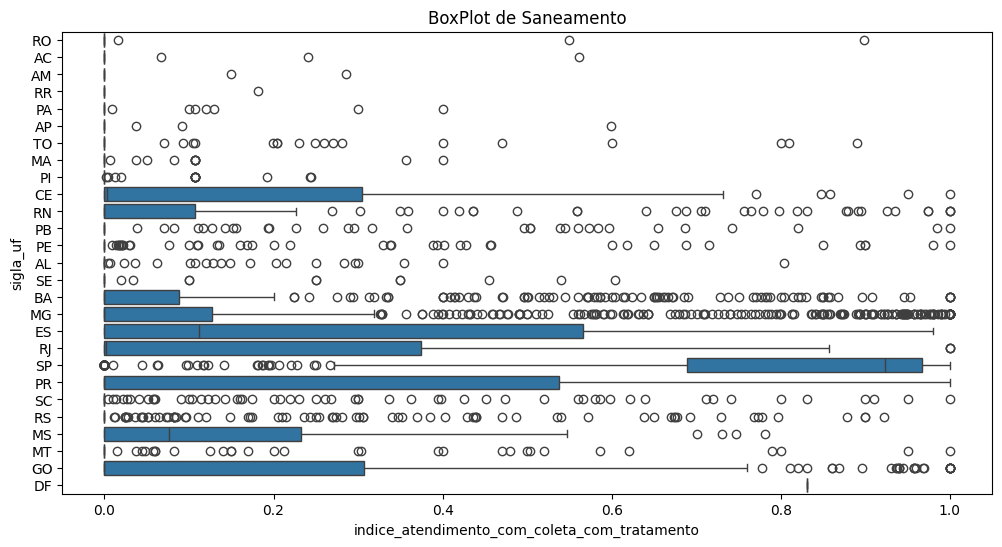

In [21]:
plt.figure(figsize=(12, 6))

sns.boxplot(esgoto, x='indice_atendimento_com_coleta_com_tratamento', y='sigla_uf',   )
plt.title('BoxPlot de Saneamento')

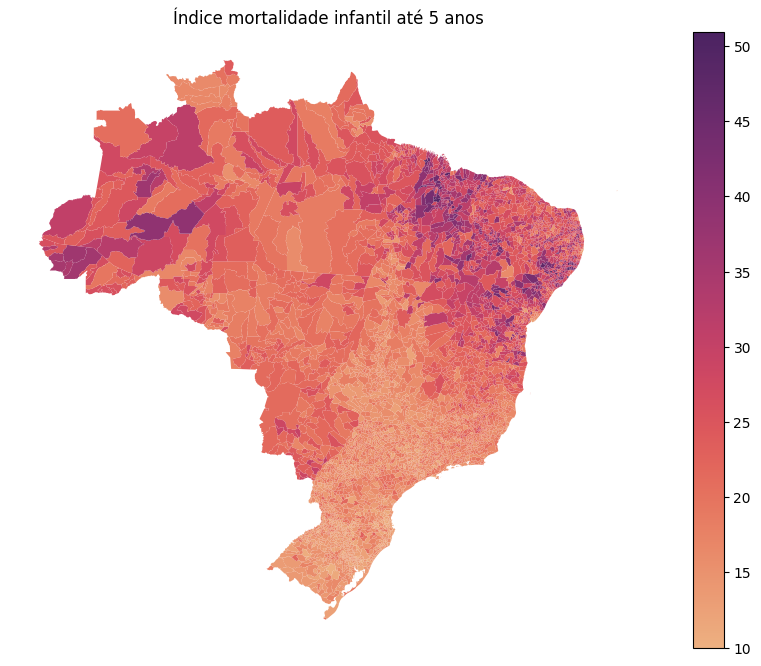

In [23]:
mapa(adh,'id_municipio', 'mortalidade_5', 'Índice mortalidade infantil até 5 anos', 'flare')

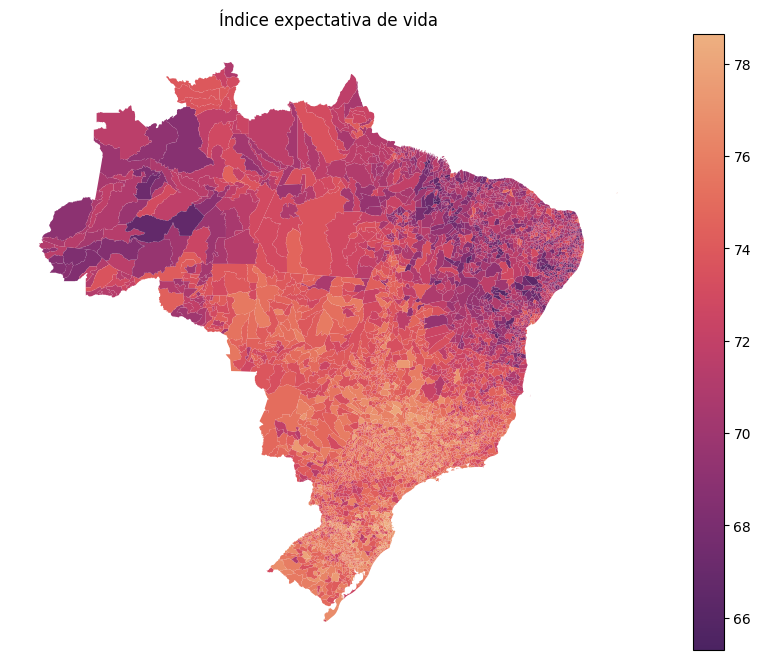

In [24]:
mapa(adh,'id_municipio', 'expectativa_vida', 'Índice expectativa de vida', 'flare_r')

da população é atendida por sistema coletivo, que inclui a rede coletora e a estação de tratamento de esgotos

In [85]:
esgoto_uf['indice_coleta']= esgoto_uf['indice_atendimento_com_coleta_sem_tratamento']+ esgoto_uf['indice_atendimento_com_coleta_com_tratamento'] + esgoto_uf['indice_atendimento_solucao_individual']
esgoto_uf.sort_values(by='indice_coleta',ascending=True)[['sigla_uf','indice_coleta','indice_atendimento_com_coleta_com_tratamento','indice_atendimento_solucao_individual']]

,sigla_uf,indice_coleta,indice_atendimento_com_coleta_com_tratamento,indice_atendimento_solucao_individual
20,RO,0.130821,0.028167,0.083937
9,MA,0.186019,0.006769,0.154319
13,PA,0.197518,0.008094,0.170336
3,AP,0.217256,0.045544,0.145681
2,AM,0.229753,0.007032,0.141303
12,MT,0.233986,0.072127,0.129436
16,PI,0.234507,0.007020,0.200692
0,AC,0.236923,0.039436,0.162759
26,TO,0.264212,0.044909,0.194795
1,AL,0.266235,0.040717,0.070716


In [59]:
estados = esgoto_uf.sort_values(by='indice_atendimento_com_coleta_sem_tratamento',ascending=True)[['sigla_uf','indice_atendimento_com_coleta_sem_tratamento']]
estados

,sigla_uf,indice_atendimento_com_coleta_sem_tratamento
6,DF,0.000000
20,RO,0.018717
13,PA,0.019088
11,MS,0.019305
17,PR,0.021770
26,TO,0.024508
9,MA,0.024931
3,AP,0.026031
16,PI,0.026795
12,MT,0.032423


**OBS: A grande quantidade de valores zerados prejudica a análise temporal dos investimentos como um todo, mas é possível fazer um foco nos estados que apresentam valor **

In [105]:
snis_uf['investimento_esgoto_estado']= snis_uf['investimento_esgoto_estado'].astype(int)

In [112]:
snis_uf[['sigla_uf','ano','investimento_esgoto_estado']][snis_uf['investimento_esgoto_estado']==0]

,sigla_uf,ano,investimento_esgoto_estado
26,AC,2022,0
43,AL,2011,0
44,AL,2012,0
45,AL,2013,0
46,AL,2014,0
...,...,...,...
749,TO,2018,0
750,TO,2019,0
751,TO,2020,0
752,TO,2021,0


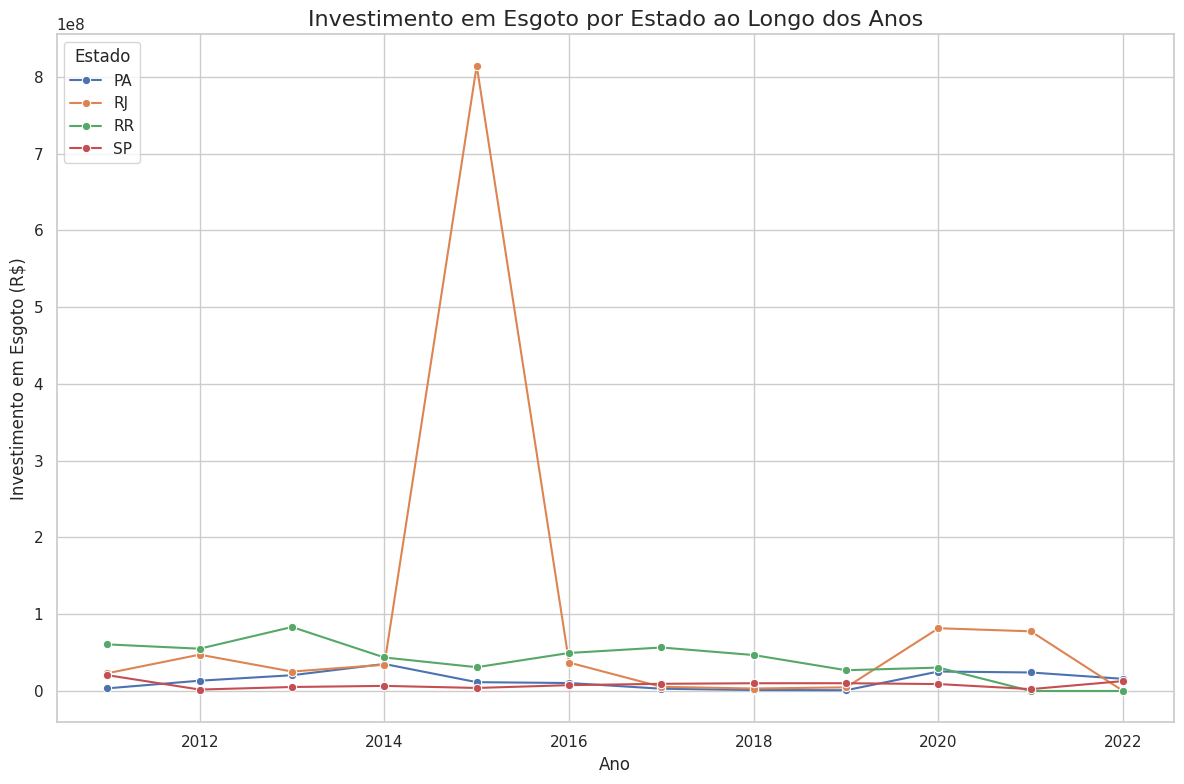

In [111]:
sns.set(style="whitegrid")
estados = ['RJ','RR','SP','PA']
# Criação do gráfico de linha, mostrando o investimento em esgoto ao longo dos anos por estado
plt.figure(figsize=(12, 8))
sns.lineplot(data=snis_uf[snis_uf['sigla_uf'].isin(estados)], x='ano', y='investimento_esgoto_estado', hue='sigla_uf', marker="o")

# Configurando o grafico
plt.title('Investimento em Esgoto por Estado ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Investimento em Esgoto (R$)', fontsize=12)
plt.legend(title='Estado', loc='upper left')
plt.tight_layout()
plt.show()

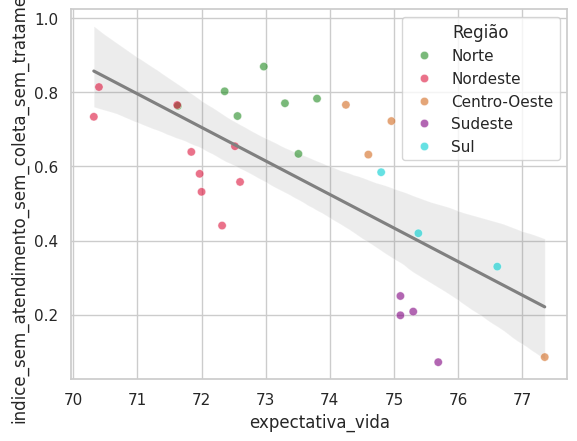

In [83]:
grafico_regressao(adh_uf,'expectativa_vida','indice_sem_atendimento_sem_coleta_sem_tratamento','regiao')

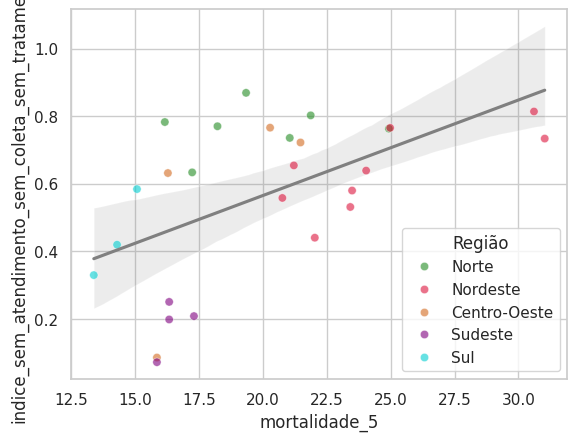

In [84]:
grafico_regressao(adh_uf,'mortalidade_5','indice_sem_atendimento_sem_coleta_sem_tratamento','regiao')

In [88]:
adh_uf['indice_sem_atendimento_sem_coleta_sem_tratamento'].corr(adh_uf['expectativa_vida'], method='pearson')


-0.698752429625204

In [86]:
adh_uf['mortalidade_5'].corr(adh_uf['indice_sem_atendimento_sem_coleta_sem_tratamento'], method='pearson')


0.547722650637252

In [57]:
calcula_r2(adh_uf['expectativa_vida'],adh_uf['indice_sem_atendimento_sem_coleta_sem_tratamento'])

0.48825495790712553

In [58]:
calcula_r2(adh_uf['mortalidade_5'],adh_uf['indice_sem_atendimento_sem_coleta_sem_tratamento'])

0.30000010202109734